###2. EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#matplotlib inline

In [3]:
df =pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#결측치 보기
df_null = df.isnull()

In [7]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# 수치데이터 요약
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###학습과 예측에 필요한 컬럼 만들기

In [9]:
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 결측치 시각화

*   값을 요약해보면 최솟값이 0으로 나오는 값들 있음 - 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있음




In [10]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [12]:
#결측치 비율
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

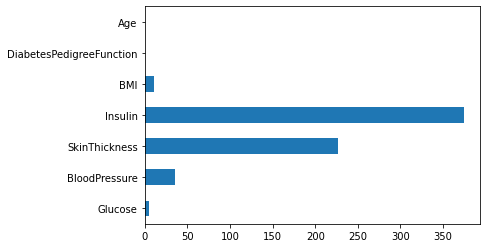

In [13]:
#결측치 시각화
df_null.sum().plot.barh()

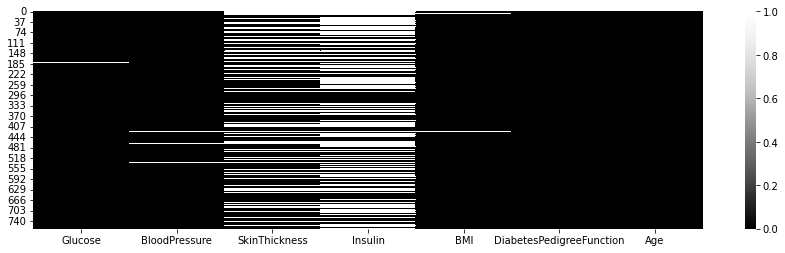

In [14]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

## 정답값

In [15]:
df['Outcome'].value_counts() #정답값의 빈도수세기

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
#비율
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [17]:
#다른 변수와 함께 보기

df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


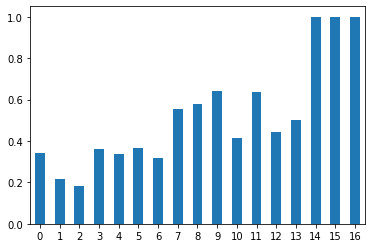

In [18]:
#임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.bar(rot=0)

## countplot




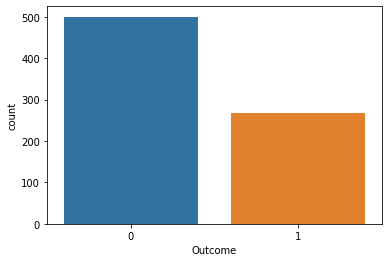

In [19]:
# *   위에서 구했던 당뇨병 발병 비율 구하기
# *   당뇨병 발병 빈도수 비교

sns.countplot(data=df, x='Outcome')

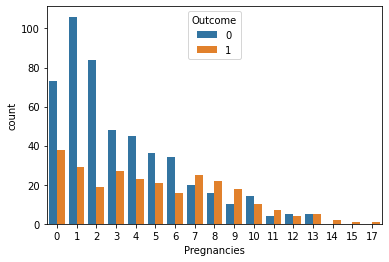

In [20]:
#임신횟수에 따른 당뇨병 발병 빈도수
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

In [21]:
#범주화

df['Pregnancies_high'] = df['Pregnancies']>6
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


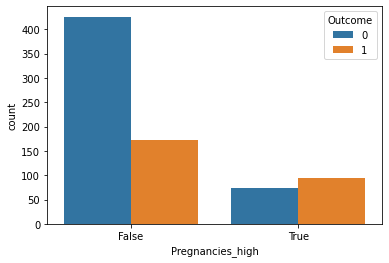

In [22]:
#시각화

sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

## barplot

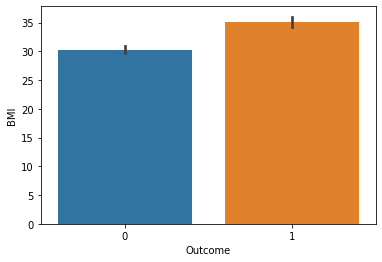

In [23]:
sns.barplot(data=df, x='Outcome', y='BMI')

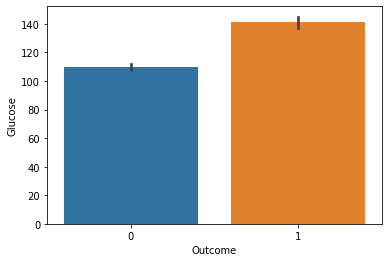

In [24]:
#포도당수치 시각화
sns.barplot(data=df, x='Outcome', y='Glucose')

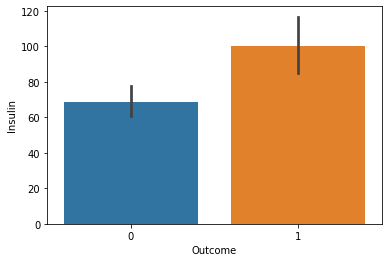

In [25]:
#인슐린
sns.barplot(data=df, x='Outcome', y='Insulin')

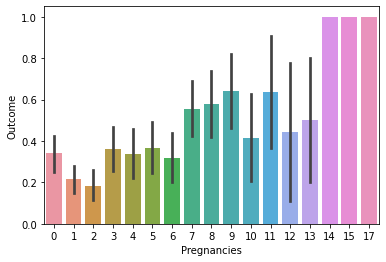

In [26]:
#임신횟수에 대해 당뇨병 발병 비율
sns.barplot(data=df, x='Pregnancies', y='Outcome')

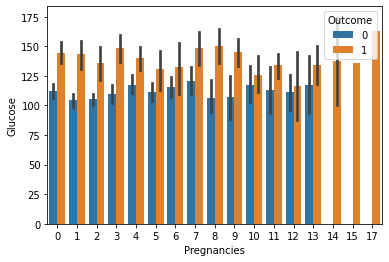

In [27]:
#임신횟수에 따른 포도당 수치를 당뇨병 발병 여부에 따라 시각화
sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

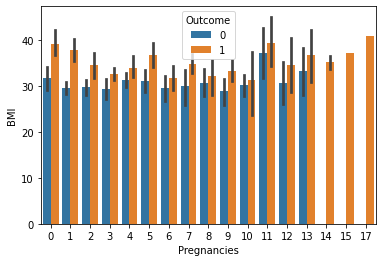

In [28]:
sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

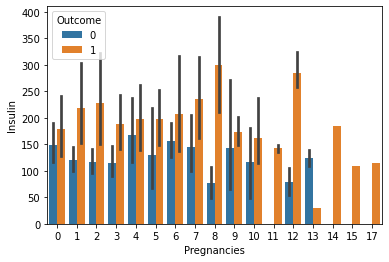

In [32]:
#임신횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
#인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다. 
sns.barplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

## boxplot

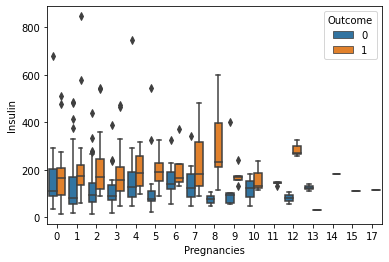

In [30]:
#임신횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
#인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다. 

sns.boxplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

## Violinplot

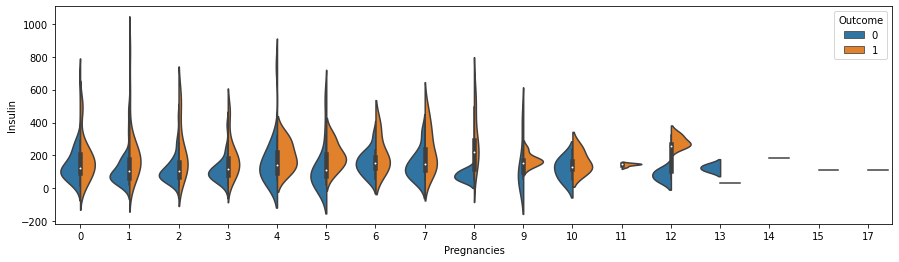

In [35]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

## Swarmplot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


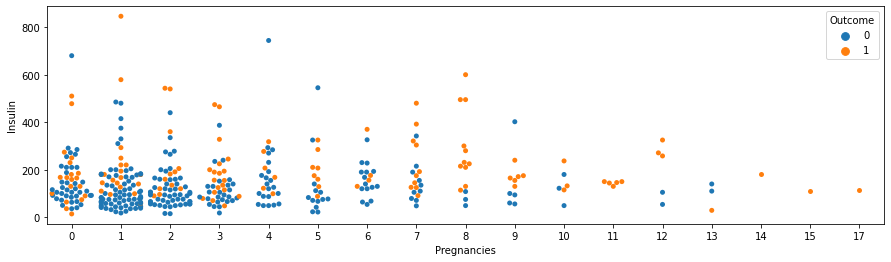

In [37]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

## distplot

In [41]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


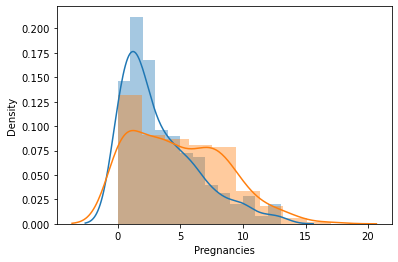

In [43]:
sns.distplot(df_0['Pregnancies']);
sns.distplot(df_1['Pregnancies']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

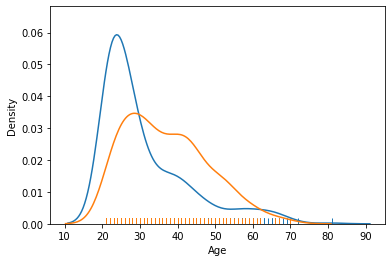

In [52]:
#나이에 따른 당뇨병 발병 여부 시각화
#영상에선 이렇게만 해도 범례 표시해주던데 왜 난 안뜨지

sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
sns.distplot(df_1['Age'], hist=False, rug=True, label=1)

## subplots

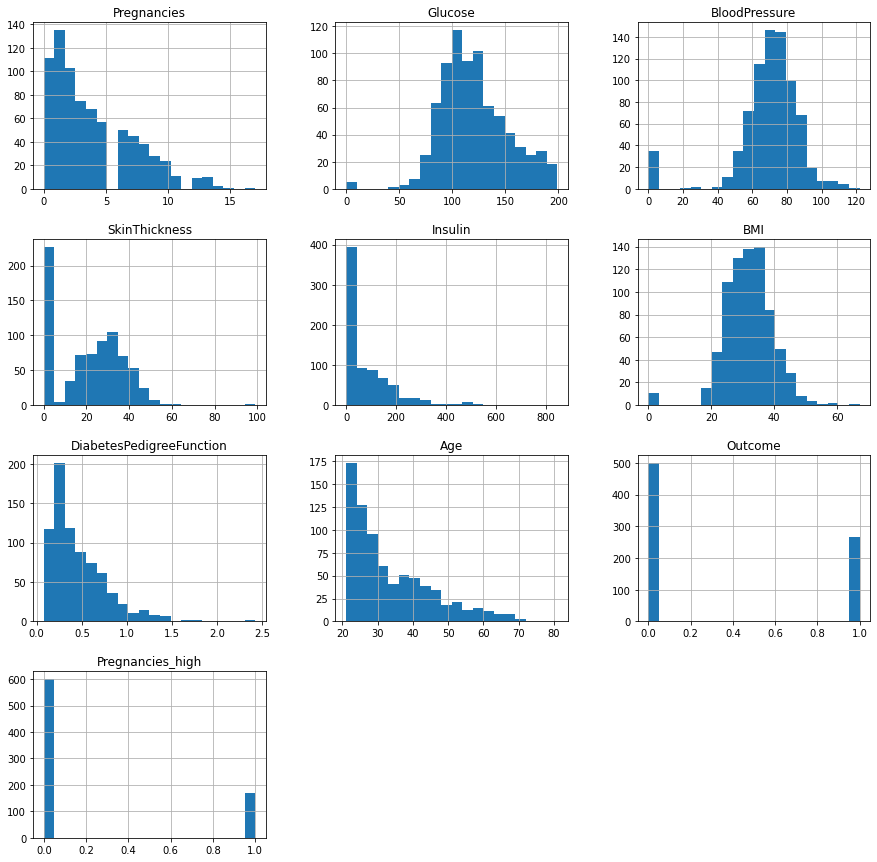

In [59]:
#bool값이면 오류나니까 숫자로 바꿔줌
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
h = df.hist(figsize=(15,15), bins=20)

### 반복문을 통한 서브플롯 그리기

In [65]:
#컬럼수 만큼 반복문 만들기
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

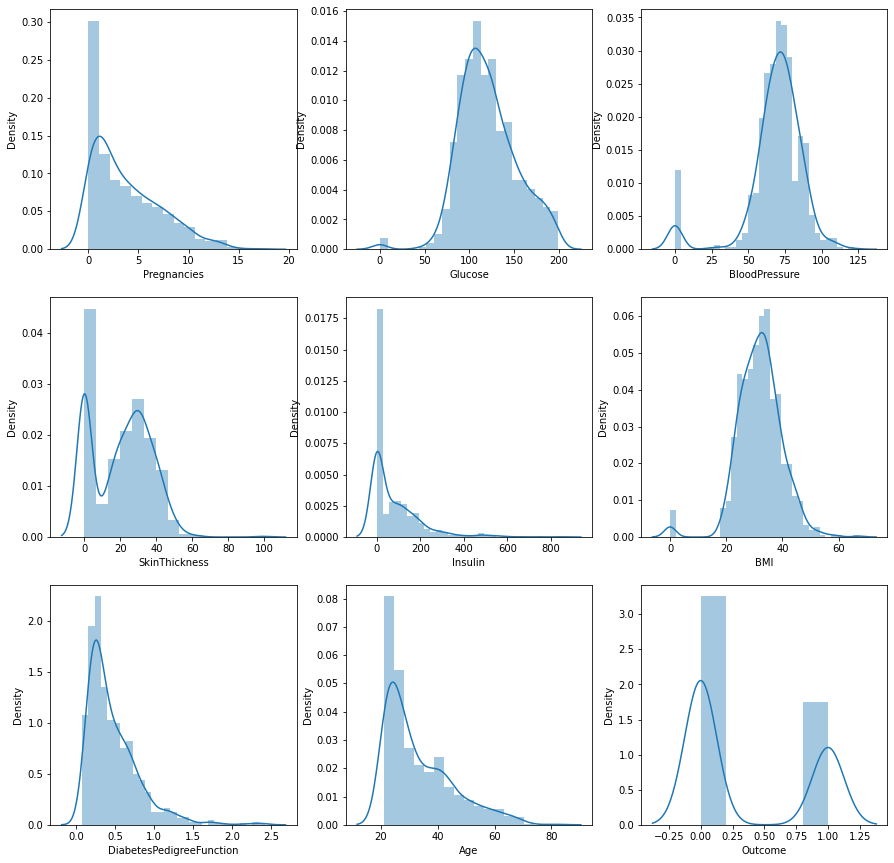

In [67]:
#distplot으로 서브플롯 그리기

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, col_name in enumerate(cols):
  row = i // 3
  col = i % 3
  
  sns.distplot(df[col_name], ax=axes[row][col])

In [68]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

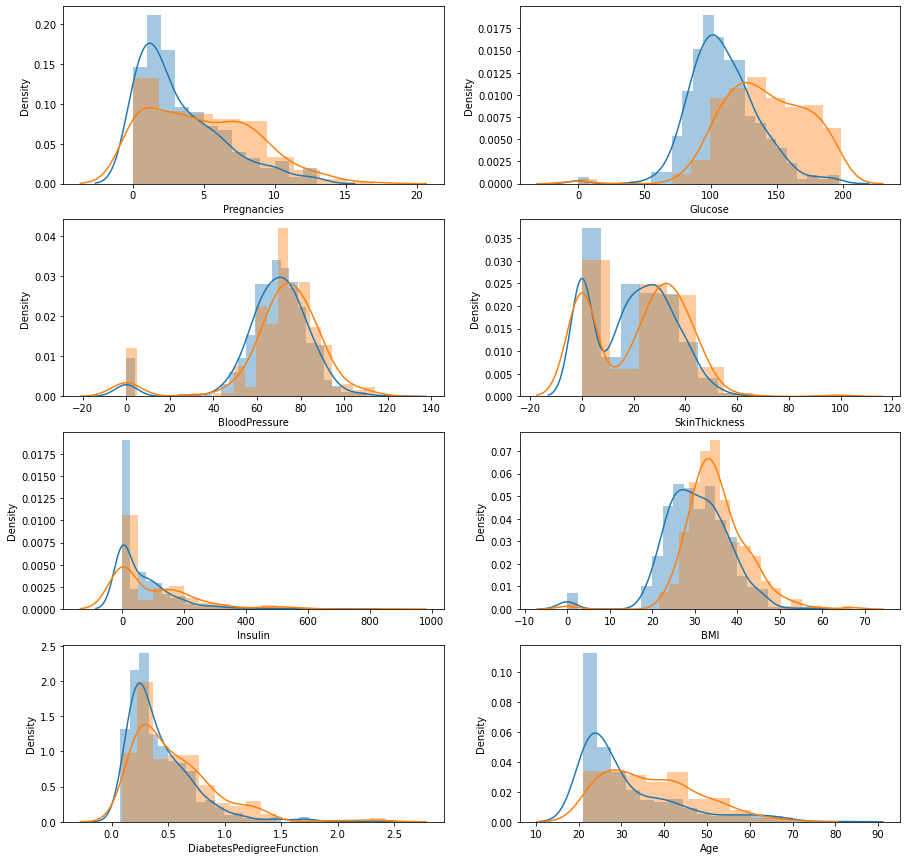

In [70]:
#distplot으로 서브플롯 그리기

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
  row = i // 2
  col = i % 2
  
  sns.distplot(df_0[col_name], ax=axes[row][col])
  sns.distplot(df_1[col_name], ax=axes[row][col])

## Violinplot

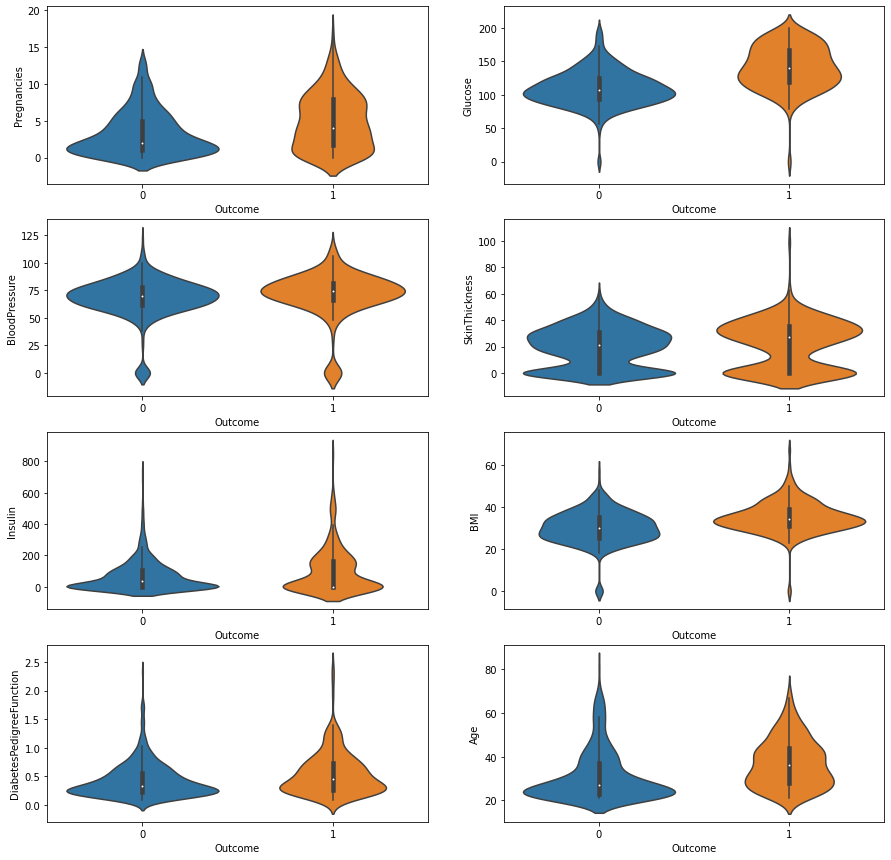

In [71]:
#distplot으로 서브플롯 그리기

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
  row = i // 2
  col = i % 2
  
  sns.violinplot(data=df, x='Outcome', y=col_name, ax=axes[row][col])


## Lmplot


*   상관계수가 높은 두 변수에 대해 시각화



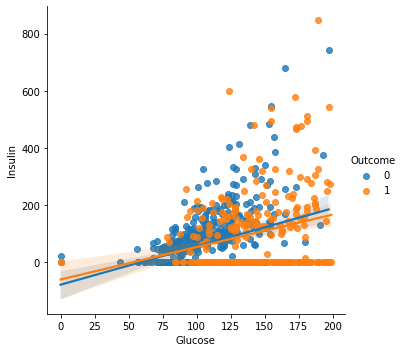

In [73]:
#Glucose 와 Insulin을 Outcome으로 구분

sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

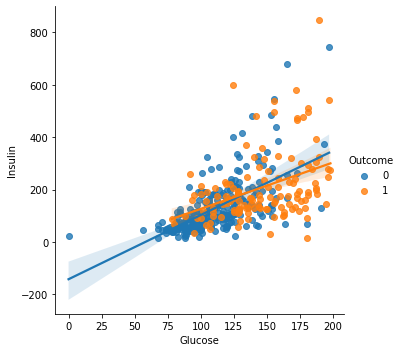

In [75]:
#인슐린 수치가 0 이상인 데이터로만 그리기 

sns.lmplot(data=df[df['Insulin']>0], x='Glucose', y='Insulin', hue='Outcome')

### pairplot

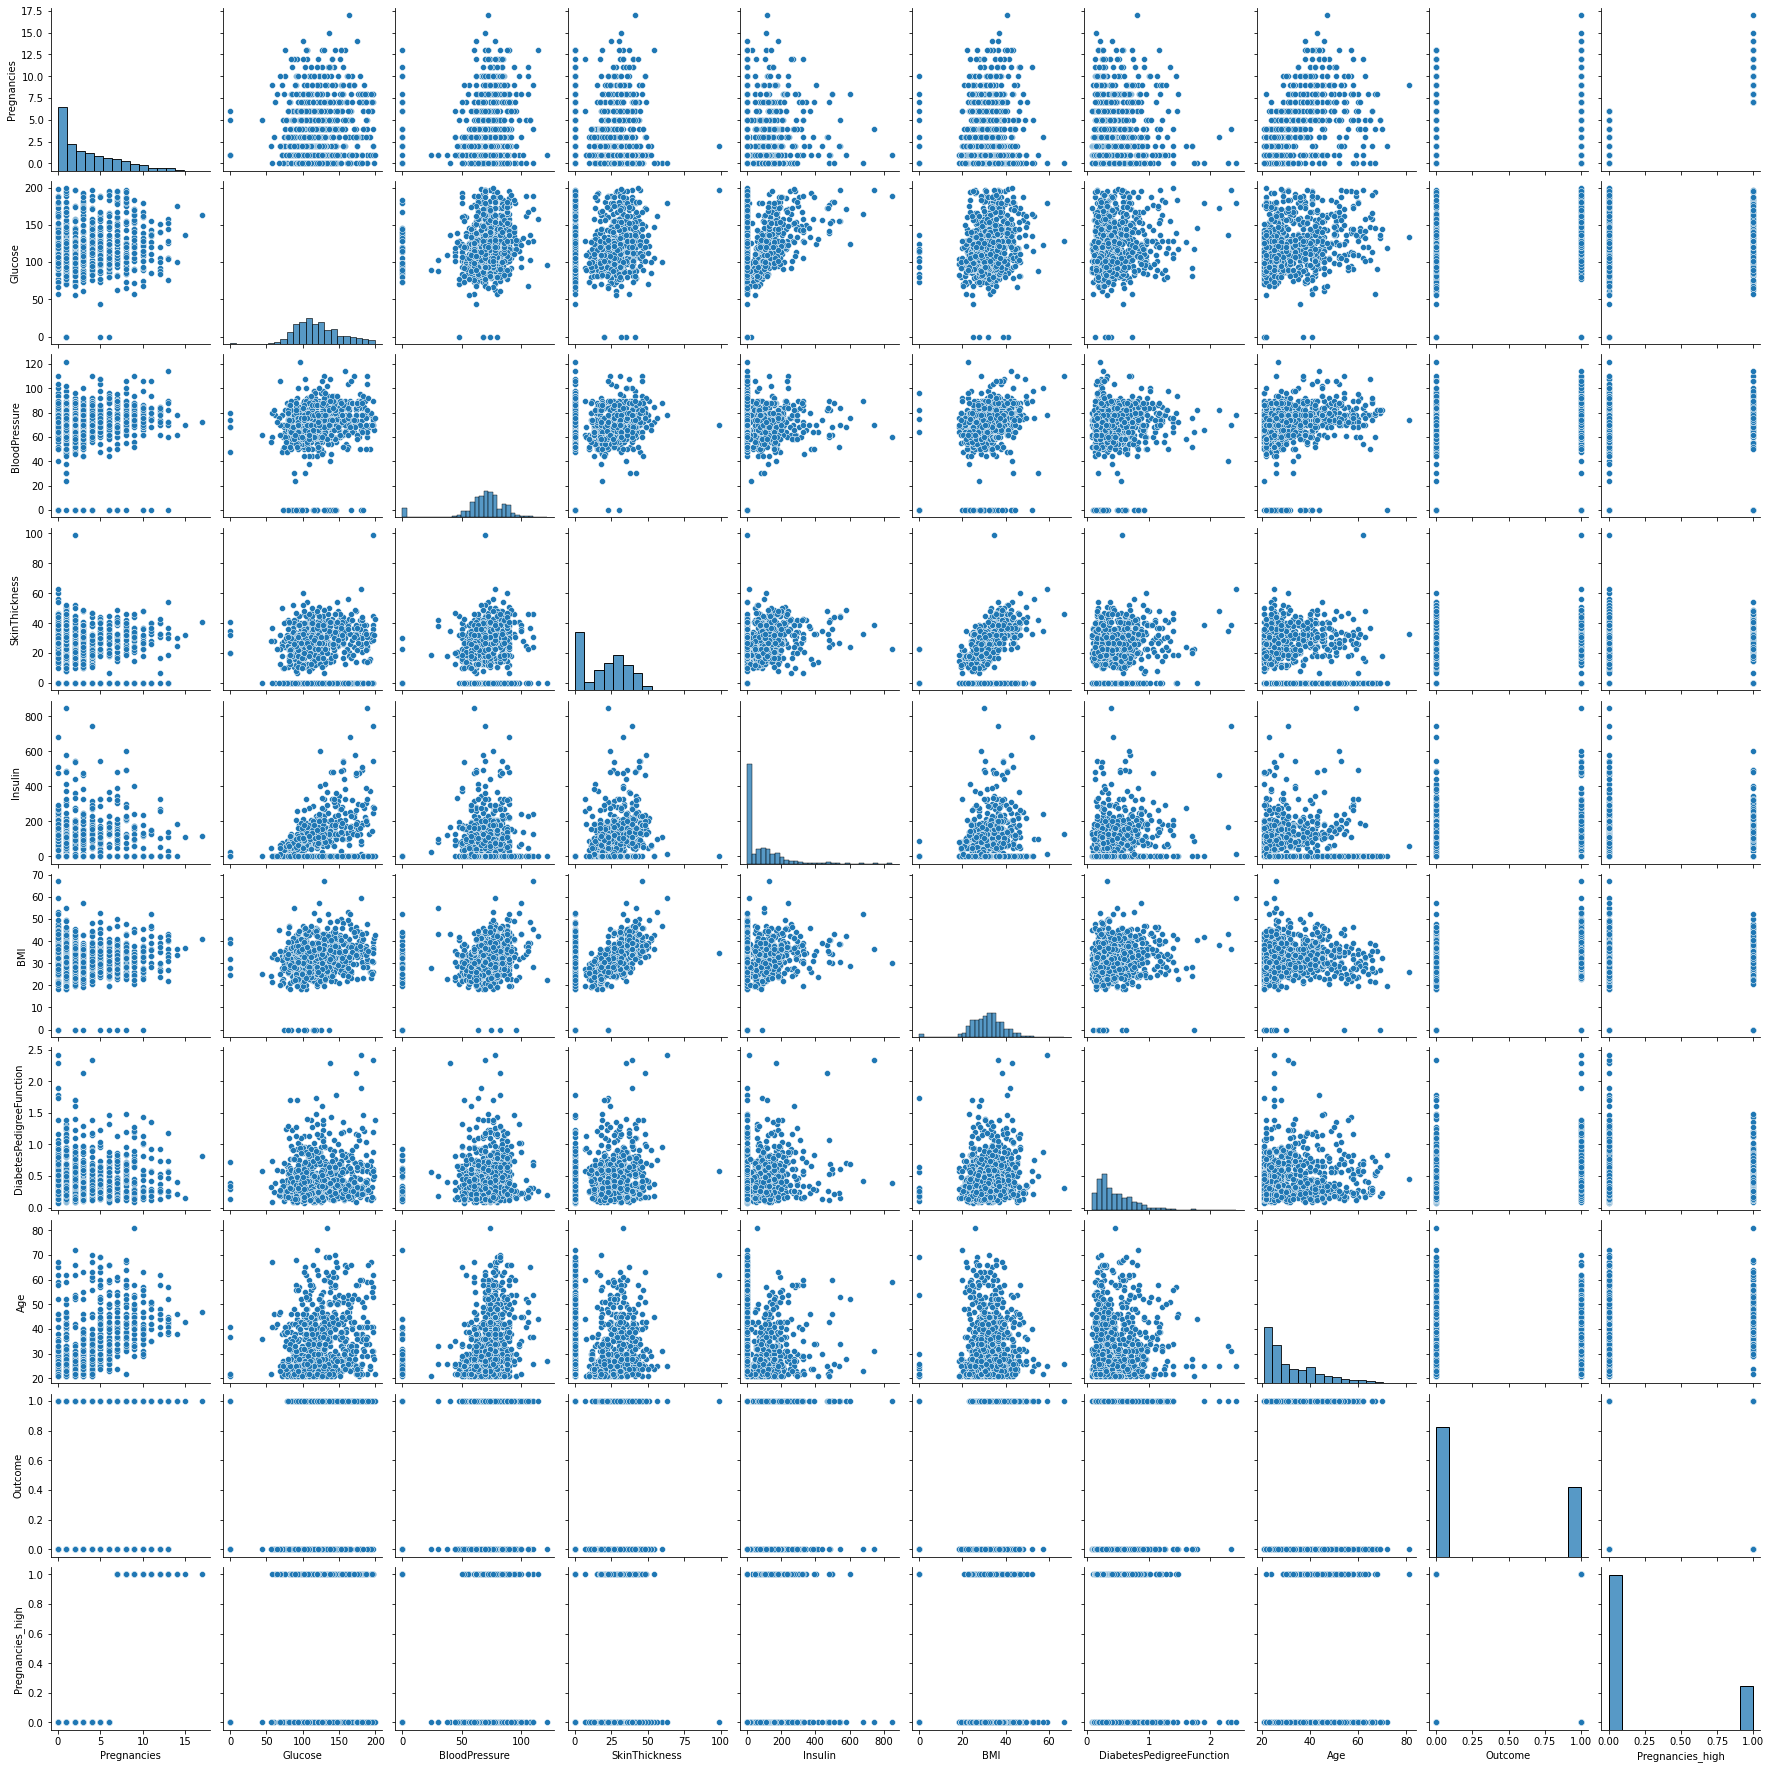

In [76]:

sns.pairplot(df)

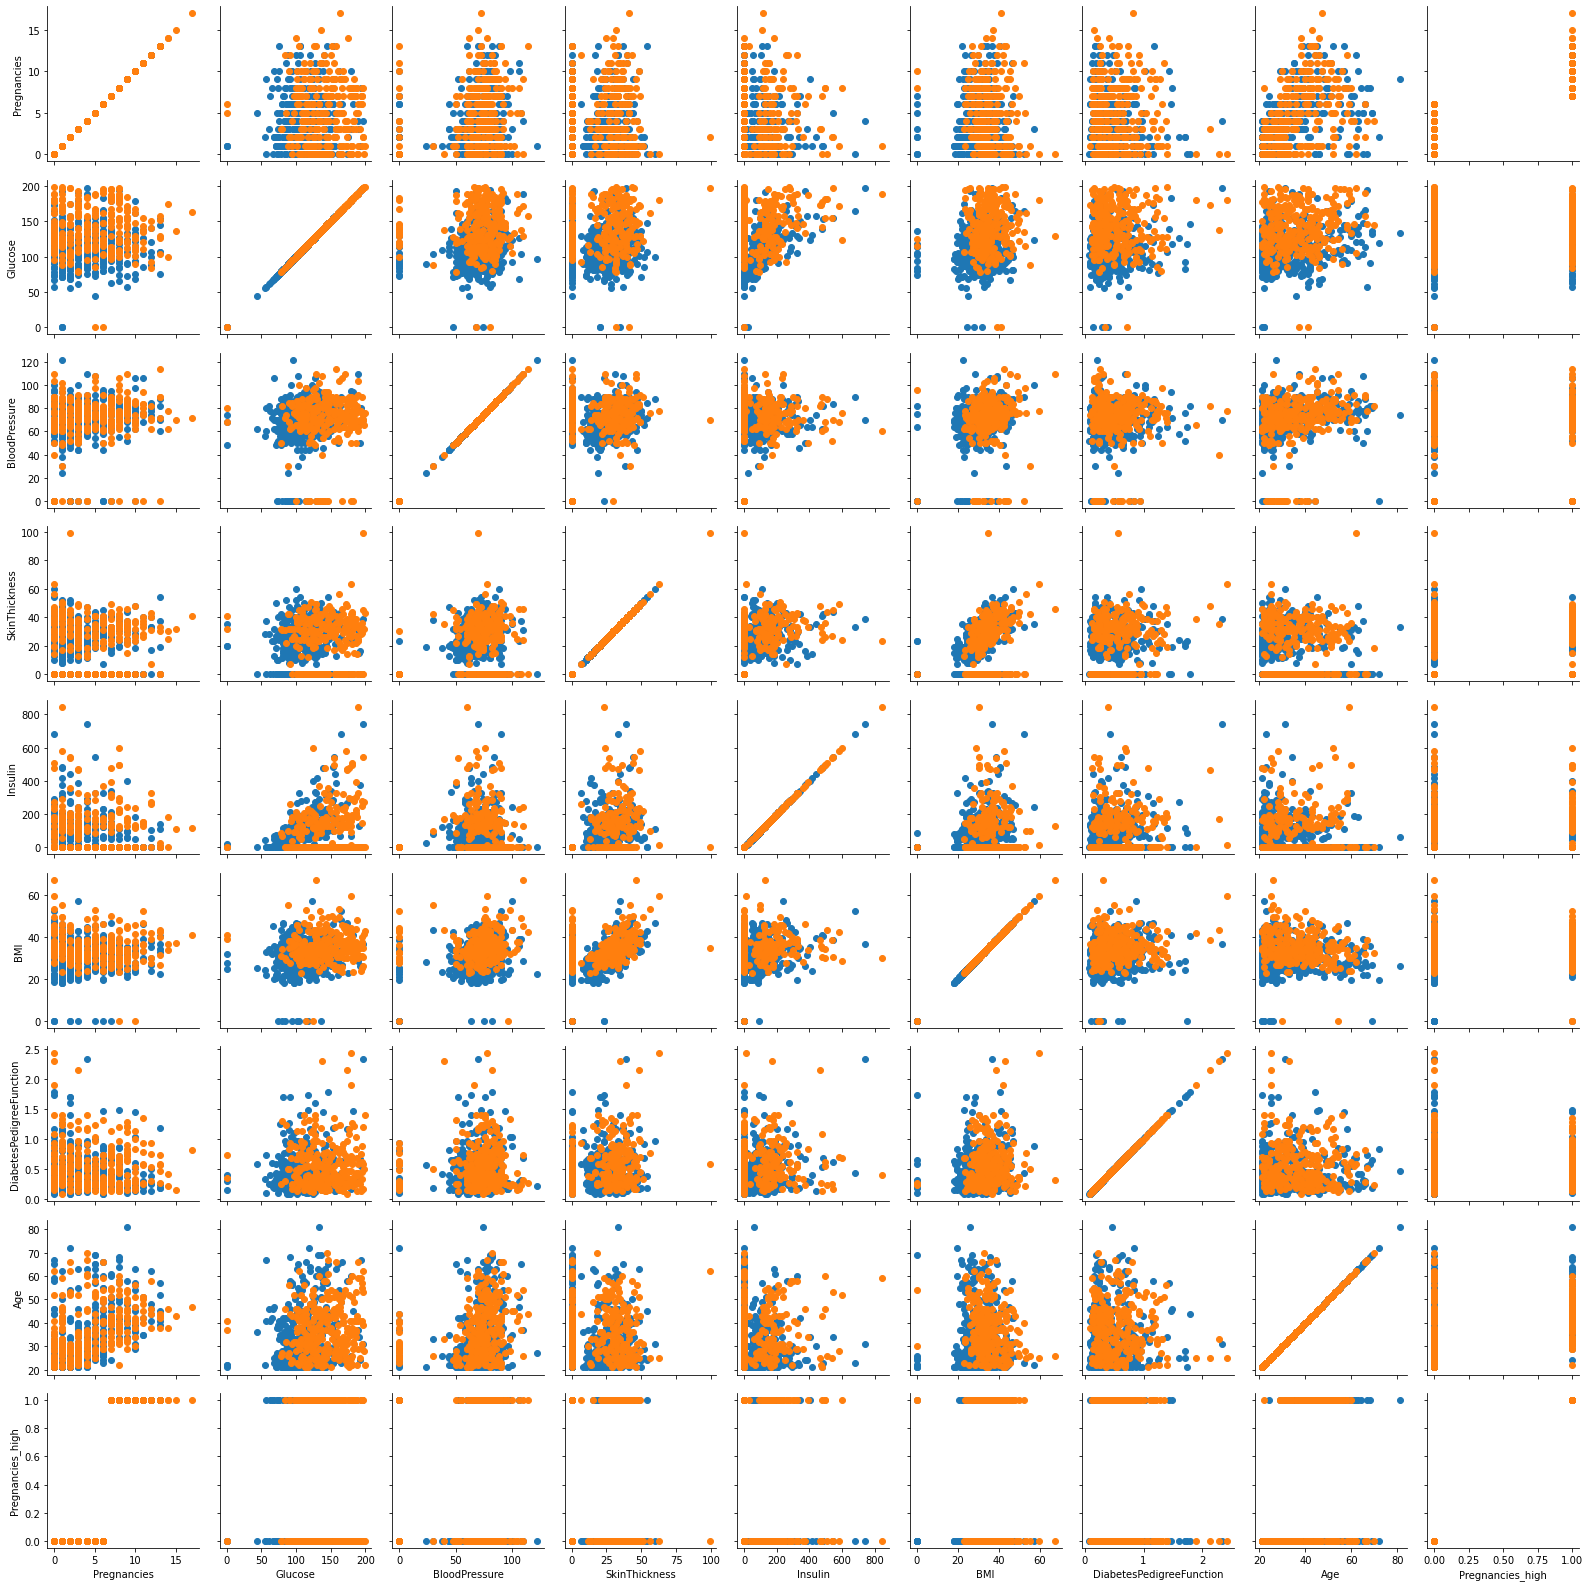

In [77]:
#PariGrid를 통해 모든 변수에 대해 Outcome에 따른 scatterplot 그리기
g = sns.PairGrid(df, hue='Outcome')
g.map(plt.scatter)

## 상관분석